## Libraries

In [325]:
import pandas as pd
import numpy as np

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score



from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import RFE #Feature Extraction with recursive feauture elimination

## Učitati skup podataka 

In [326]:
bank=pd.read_csv('C:\\Users\\Dusica\\Downloads\\Bank Marketing\\bank-additional.txt',sep=';')

## Deskriptivna statistika skupa podataka 

In [327]:
bank.shape


(4119, 21)

In [328]:
bank.describe()

age     duration     campaign        pdays     previous  \
count  4119.000000  4116.000000  4114.000000  4119.000000  4117.000000   
mean     40.113620   256.869048     2.534273   960.422190     0.190430   
std      10.313362   254.763913     2.566673   191.922786     0.541904   
min      18.000000     0.000000     1.000000     0.000000     0.000000   
25%      32.000000   103.000000     1.000000   999.000000     0.000000   
50%      38.000000   181.000000     2.000000   999.000000     0.000000   
75%      47.000000   317.250000     3.000000   999.000000     0.000000   
max      88.000000  3643.000000    35.000000   999.000000     6.000000   

       emp.var.rate  cons.price.idx  cons.conf.idx    euribor3m  
count   4116.000000     4117.000000    4117.000000  4117.000000  
mean       0.084694       93.579540     -40.486358     4.858993  
std        1.563361        0.579442       4.639840    79.432456  
min       -3.400000       92.201000     -50.800000     0.635000  
25%       -1.800000       93.075000     -42.700000     1.334000  
50%        1.100000       93.749000     -41.800000     4.857000  
75%        1.400000       93.994000     -36.400000     4.961000  
max        1.400000       94.767000       1.266000  5099.100000

In [329]:
bank.select_dtypes(include=['object']).describe()

job  marital          education default housing  loan   contact  \
count     4119     4119               4119    4119    4119  4119      4119   
unique      12        4                  8       3       3     3         2   
top     admin.  married  university.degree      no     yes    no  cellular   
freq      1012     2509               1264    3315    2175  3349      2652   

       month day_of_week     poutcome nr.employed     y  
count   4119        4119         4119        4118  4118  
unique    10           5            3          12     2  
top      may         thu  nonexistent      5228.1    no  
freq    1378         860         3523        1625  3667

In [330]:
type(bank.isnull().sum())

pandas.core.series.Series

In [331]:
pd.concat([bank.dtypes,bank.isnull().sum()],axis=1)

0  1
age               int64  0
job              object  0
marital          object  0
education        object  0
default          object  0
housing          object  0
loan             object  0
contact          object  0
month            object  0
day_of_week      object  0
duration        float64  3
campaign        float64  5
pdays             int64  0
previous        float64  2
poutcome         object  0
emp.var.rate    float64  3
cons.price.idx  float64  2
cons.conf.idx   float64  2
euribor3m       float64  2
nr.employed      object  1
y                object  1

In [332]:
a=[]
for i in range(len(bank.isnull().sum())):
        if bank.isnull().sum()[i]>0:
            a.append(bank.isnull().sum()[i])
            print (bank.columns[i],bank.isnull().sum()[i])
print('Conclusion: There are ',len(a),' NULL values')

duration 3
campaign 5
previous 2
emp.var.rate 3
cons.price.idx 2
cons.conf.idx 2
euribor3m 2
nr.employed 1
y 1
Conclusion: There are  9  NULL values


## Priprema skupa podataka
(tako da bude pogodan za prediktivno modelovanje)

Input(duration) should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.

In [333]:
bank.drop(['duration'],axis=1,inplace=True)

### *Resavanje null vrednosti*

In [334]:
bank.dropna(subset=['y'],inplace=True)

In [335]:
#set(bank['nr.employed'])

In [336]:
pd.concat([bank['cons.price.idx'].describe(),bank['previous'].describe()],axis=1)

#moze mean jer std ima malu vrednost

cons.price.idx     previous
count     4116.000000  4116.000000
mean        93.579707     0.190476
std          0.579413     0.541961
min         92.201000     0.000000
25%         93.075000     0.000000
50%         93.749000     0.000000
75%         93.994000     0.000000
max         94.767000     6.000000

In [337]:
mean_cons_price_idx=bank['cons.price.idx'].dropna().mean()
#mean_cons_price_idx=np.average(bank['cons.price.idx'].dropna())

In [338]:
mean_previous=bank['previous'].dropna().mean()

In [339]:
bank['cons.price.idx'].replace(np.nan,mean_cons_price_idx,inplace=True)

In [340]:
bank['previous'].replace(np.nan,mean_previous,inplace=True)

In [341]:
bank['nr.employed']=pd.to_numeric(bank['nr.employed'],downcast='float')

In [342]:
bank['nr.employed'].fillna(value=bank['nr.employed'].dropna().mean(),inplace=True)

In [343]:
bank['nr.employed'].describe()

count    4118.000000
mean     5166.518555
std        73.662903
min      4963.600098
25%      5099.100098
50%      5191.000000
75%      5228.100098
max      5228.100098
Name: nr.employed, dtype: float64

campaign	float64	5
emp.var.rate	float64	3
cons.conf.idx	float64	2
euribor3m	float64	2

In [344]:
pd.concat([bank['campaign'].describe(),bank['emp.var.rate'].describe(),bank['cons.conf.idx'].describe(),bank['euribor3m'].describe()],axis=1)

campaign  emp.var.rate  cons.conf.idx    euribor3m
count  4113.000000   4115.000000    4116.000000  4116.000000
mean      2.533917      0.085152     -40.496501     3.621325
std       2.566883      1.563274       4.594520     1.733618
min       1.000000     -3.400000     -50.800000     0.635000
25%       1.000000     -1.800000     -42.700000     1.334000
50%       2.000000      1.100000     -41.800000     4.857000
75%       3.000000      1.400000     -36.400000     4.961000
max      35.000000      1.400000     -26.900000     5.045000

In [345]:
bank['campaign'].replace(np.nan,bank['campaign'].dropna().mean(),inplace=True)

In [346]:
bank['emp.var.rate'].replace(np.nan,bank['emp.var.rate'].dropna().mean(),inplace=True)

In [347]:
bank['cons.conf.idx'].replace(np.nan,bank['cons.conf.idx'].dropna().mean(),inplace=True)

In [348]:
bank['euribor3m'].replace(np.nan,bank['euribor3m'].dropna().mean(),inplace=True)

Diskretizacija klasifikatora

In [349]:
bank['y'] = np.where(bank['y']=='no', 0, 1)

In [350]:
#999 means client was not previously contacted
bank['pdays'] =bank['pdays'].replace(999, -1)

In [351]:
bank['pdays'].unique()

array([-1, 12,  3,  6,  5,  2, 10, 11,  7,  1, 18,  4, 15,  0, 16,  9, 19,
       17, 13, 21, 14], dtype=int64)

#eliminate categorical variables from sample

In [352]:
#bank_without_cat=bank.select_dtypes(exclude=['object'])

In [353]:
a=[]
for i in range(len(bank.isnull().sum())):
        if bank.isnull().sum()[i]>0:
            a.append(bank.isnull().sum()[i])
            print (bank.columns[i],bank.isnull().sum()[i])
print('Conclusion: There are ',len(a),' NULL values')

Conclusion: There are  0  NULL values


# Kreiranje dummy variables

In [31]:
dummies=bank.select_dtypes(include=['object']).drop(['month','day_of_week'],axis=1)

In [32]:
dummies.head()

job  marital          education default  housing     loan  \
0  blue-collar  married           basic.9y      no      yes       no   
1     services   single        high.school      no       no       no   
2     services  married        high.school      no      yes       no   
3     services  married           basic.9y      no  unknown  unknown   
4       admin.  married  university.degree      no      yes       no   

     contact     poutcome  
0   cellular  nonexistent  
1  telephone  nonexistent  
2  telephone  nonexistent  
3  telephone  nonexistent  
4   cellular  nonexistent

In [33]:
dummies=pd.get_dummies(dummies)

In [34]:
dummy_bank=bank.join(dummies).select_dtypes(exclude=['object'])
dummy_bank_a=dummy_bank.drop('y',axis=1)
dummy_bank_b=dummy_bank['y']

In [35]:
dummy_bank.head()

age  campaign  pdays  previous  emp.var.rate  cons.price.idx  \
0   30       2.0     -1       0.0          -1.8          92.893   
1   39       4.0     -1       0.0           1.1          93.994   
2   25       1.0     -1       0.0           1.4          94.465   
3   38       3.0     -1       0.0           1.4          94.465   
4   47       1.0     -1       0.0          -0.1          93.200   

   cons.conf.idx  euribor3m  nr.employed  y        ...         \
0          -46.2      1.313  5099.100098  0        ...          
1          -36.4      4.855  5191.000000  0        ...          
2          -41.8      4.962  5228.100098  0        ...          
3          -41.8      4.959  5228.100098  0        ...          
4          -42.0      4.191  5195.799805  0        ...          

   housing_unknown  housing_yes  loan_no  loan_unknown  loan_yes  \
0                0            1        1             0         0   
1                0            0        1             0         0   
2                0            1        1             0         0   
3                1            0        0             1         0   
4                0            1        1             0         0   

   contact_cellular  contact_telephone  poutcome_failure  \
0                 1                  0                 0   
1                 0                  1                 0   
2                 0                  1                 0   
3                 0                  1                 0   
4                 1                  0                 0   

   poutcome_nonexistent  poutcome_success  
0                     1                 0  
1                     1                 0  
2                     1                 0  
3                     1                 0  
4                     1                 0  

[5 rows x 48 columns]

## Podela skupa podataka na trening i test u odnosu 70:30

In [36]:
def split_train_test(bank, test_percentage, shuffle=True):
    df=bank.sample(frac=1)
    n=len(df)
    split=int(np.floor(n*test_percentage))
    test= df.iloc[:split,:]
    train=df.iloc[split:,:]
    return (train, test)

In [37]:
#from sklearn.model_selection import train_test_split
#drugi nacin, ali ista stvar;identicno radi

In [38]:
train,test=split_train_test(bank,0.3)


In [39]:
train.shape

(2883, 20)

In [40]:
test.shape

(1235, 20)

In [41]:
y_train=train['y']
#y_train=train.loc[:,'y']

In [42]:
y_train.shape

(2883,)

In [43]:
x_train=train.drop('y',axis=1).select_dtypes(exclude=['object'])

In [44]:
x_train.shape

(2883, 9)

In [45]:
x_test=test.drop('y',axis=1).select_dtypes(exclude=['object'])

In [46]:
y_test=test['y']

Kreirati minimalno 2 prediktivna modela (sa default parametrima) i oceniti gresku na test setu (minimum 2 mere evaluacije)

# Logistic regression

In [47]:
lr=LogisticRegression()

In [48]:
modelLR=lr.fit(x_train,y_train)

In [49]:
predictionsLR=modelLR.predict(x_test)

In [50]:
predict_train=modelLR.predict(x_train)

In [51]:
prediction_probs=modelLR.predict_proba(x_test)
prediction_probs

array([[ 0.93630897,  0.06369103],
       [ 0.89002719,  0.10997281],
       [ 0.52072743,  0.47927257],
       ..., 
       [ 0.87234438,  0.12765562],
       [ 0.95481124,  0.04518876],
       [ 0.88951962,  0.11048038]])

In [52]:
print('ACCURACY')
print('Train')
print(accuracy_score(y_train,predict_train))
print('Test')
print(accuracy_score(y_test,predictionsLR))

ACCURACY
Train
0.894207422823
Test
0.914170040486


In [53]:
print('        Precision'+'     '+'   Recall')
print('Train  ',precision_score(y_train,predict_train),'  ',recall_score(y_train,predict_train))
print('Test   ',precision_score(y_test,predictionsLR),'      ','    ' ,recall_score(y_test,predictionsLR))

        Precision        Recall
Train   0.647058823529    0.135384615385
Test    0.884615384615             0.18253968254


In [54]:
print('CONFUSION MATRIX')
print('Train')
confusion_matrix(y_train, predict_train)

CONFUSION MATRIX
Train


array([[2534,   24],
       [ 281,   44]], dtype=int64)

In [55]:
y_train.value_counts()

0    2558
1     325
Name: y, dtype: int64

In [56]:
print('CONFUSION MATRIX')
print('Test')
cm=confusion_matrix(y_test, predictionsLR)

CONFUSION MATRIX
Test


In [57]:
y_test.value_counts()

0    1109
1     126
Name: y, dtype: int64

# Random Forest

In [58]:
from sklearn.ensemble import RandomForestClassifier

In [59]:
rf=RandomForestClassifier()

In [60]:
modelRF=rf.fit(x_train,y_train)

In [61]:
predictionsRF_train=modelRF.predict(x_train)

In [62]:
predictionsRF=modelRF.predict(x_test)

In [63]:
confusion_matrix(y_test,predictionsRF)

array([[1066,   43],
       [ 101,   25]], dtype=int64)

In [64]:
print('           Accuracy   '+'        Precision'+'     '+'   Recall')
print('Train  ',' ',accuracy_score(y_train,predictionsRF_train),'   ',precision_score(y_train,predictionsRF_train),' ',recall_score(y_train,predictionsRF_train))
print('Test   ',' ',accuracy_score(y_test,predictionsRF),'    ',precision_score(y_test,predictionsRF),' ',recall_score(y_test,predictionsRF))


           Accuracy           Precision        Recall
Train     0.97155740548     0.965517241379   0.775384615385
Test      0.883400809717      0.367647058824   0.198412698413


# KNeighborsClassifier

In [65]:
knn=KNeighborsClassifier()

In [66]:
modelknn=knn.fit(x_train, y_train)

In [67]:
predictionsKNN_train=knn.predict(x_train)

In [68]:
predictionsKNN=knn.predict(x_test)

In [69]:
prediction_probs_knn=knn.predict_proba(x_test)

In [70]:
print('           Accuracy   '+'        Precision'+'     '+'   Recall')
print('Train  ',' ',accuracy_score(y_train,predictionsKNN_train),'   ',precision_score(y_train,predictionsKNN_train),' ',recall_score(y_train,predictionsKNN_train))
print('Test   ',' ',accuracy_score(y_test,predictionsKNN),'   ',precision_score(y_test,predictionsKNN),' ',recall_score(y_test,predictionsKNN))


           Accuracy           Precision        Recall
Train     0.910163024627     0.722972972973   0.329230769231
Test      0.895546558704     0.471698113208   0.198412698413


### Cross validation

In [71]:
models=[lr,rf,knn]

In [72]:
for mod in models:
    print (mod)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')


In [73]:
for num in range(len(models)):
    scores=cross_val_score(models[num-1],x_train,y_train,cv=5,scoring='accuracy')
    print (scores,'--->',scores.mean())

[ 0.89428076  0.88041594  0.86481802  0.89409722  0.88194444] ---> 0.883111279607
[ 0.89774697  0.88561525  0.89774697  0.89409722  0.88715278] ---> 0.892471837088
[ 0.89948007  0.87175043  0.86481802  0.87152778  0.87152778] ---> 0.875820816484


In [74]:
for num in range(len(models)):
    scores=cross_val_score(models[num-1],x_test,y_test,cv=5,scoring='accuracy')
    print (scores,'--->',scores.mean())
#np.average(scores)

[ 0.90725806  0.88663968  0.87854251  0.90283401  0.89430894] ---> 0.893916640388
[ 0.9233871   0.91497976  0.90688259  0.92307692  0.91463415] ---> 0.916592102874
[ 0.90322581  0.89878543  0.90283401  0.88259109  0.89837398] ---> 0.897162063301


## Optimizacija parametara

In [75]:
rf

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [76]:
params = [
  {'n_estimators': [10, 20, 40, 100, 300, 400], 'max_depth': [1, 5, 10, 15]}
 ]

In [77]:
optimizer = GridSearchCV(rf, 
                   param_grid=params, 
                         cv=3,  
                   return_train_score=True)

In [78]:
opt_rf=optimizer.fit(x_train,y_train)

In [79]:
opt_rf.best_estimator_
#n_estimators=100 i max_depth=5

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=5, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=400, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [80]:
probas_opt=opt_rf.predict_proba(x_test)

In [81]:
predictions_opt=opt_rf.predict(x_test)

In [82]:
lr

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [83]:
knn

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [84]:
params2 = [
  {'leaf_size': [10, 20, 40, 50, 100], 'n_neighbors': [1, 2, 3, 4, 5, 6, 7]}
 ]

In [85]:
optimizer2 = GridSearchCV(knn, 
                   param_grid=params2, 
                         cv=3,  
                   return_train_score=True)

In [86]:
opt_rf2=optimizer2.fit(x_train,y_train)

In [87]:
opt_rf2.best_estimator_
#leaf_size=20, n_neighbors=4,

KNeighborsClassifier(algorithm='auto', leaf_size=10, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=4, p=2,
           weights='uniform')

In [88]:
probas_opt_knn=opt_rf2.predict_proba(x_test)
predictions_opt_knn=opt_rf2.predict(x_test)

## Parameter optimization - Results
### Random Forest 

In [89]:
print('ACCURACY\n','Before',accuracy_score(y_test,predictionsRF),'\n After ',accuracy_score(y_test,predictions_opt))

ACCURACY
 Before 0.883400809717 
 After  0.909311740891


In [90]:
print('PRECISION\n Before',precision_score(y_test,predictionsRF),'\n After ',precision_score(y_test,predictions_opt))

PRECISION
 Before 0.367647058824 
 After  0.652173913043


In [91]:
print('RECALL\n Before',recall_score(y_test,predictionsRF),'\n After ',recall_score(y_test,predictions_opt))

RECALL
 Before 0.198412698413 
 After  0.238095238095


### KNN 

In [92]:
print('Accuracy')
print('Before',accuracy_score(y_test,predictionsKNN),'\nAfter ',accuracy_score(y_test,predictions_opt_knn))

Accuracy
Before 0.895546558704 
After  0.895546558704


In [93]:
print('Precision')
print('Before',precision_score(y_test,predictionsKNN),'\nAfter ',precision_score(y_test,predictions_opt_knn))

Precision
Before 0.471698113208 
After  0.457142857143


In [94]:
print('Recall')
print('Before',recall_score(y_test,predictionsKNN),'\nAfter ',recall_score(y_test,predictions_opt_knn))

Recall
Before 0.198412698413 
After  0.126984126984


### Podela inicijalnog skupa podataka na osnovu jednog kategoričkog atributa u datasetu

In [95]:
#for n in range(len(categories)):
 #   listaDF.append(bank.loc[lambda bank:bank['loan']==categories[n]])

In [96]:
categories=bank.loan.unique()
listaDF=[]
for rb in range(len(listaDF)):

    scores=cross_val_score(rf,listaDF[rb].drop('y',axis=1).select_dtypes(exclude=['object']),listaDF[rb]['y'],cv=5,scoring='accuracy')
    print (len(listaDF[rb].loan),listaDF[rb].loan.unique(),scores,'--->',scores.mean())
    

In [97]:
####ovo
listaDF=[]
categories=bank.housing.unique()
for n in range(len(categories)):
     listaDF.append(bank.loc[lambda bank:bank['housing']==categories[n]])

In [98]:
for rb in range(len(listaDF)):
    scores=cross_val_score(rf,listaDF[rb].drop('y',axis=1).select_dtypes(exclude=['object']),listaDF[rb]['y'],cv=5,scoring='roc_auc')
    print(len(listaDF[rb].housing),listaDF[rb].housing.unique(),scores,'--->',scores.mean())

2175 ['yes'] [ 0.7307009   0.68577735  0.76900301  0.6812823   0.70184647] ---> 0.713722006891
1838 ['no'] [ 0.63236169  0.6344074   0.73126911  0.72389144  0.81425841] ---> 0.707237609767
105 ['unknown'] [ 0.725       0.98684211  0.89473684  1.          0.97368421] ---> 0.916052631579


In [99]:
bank['marital'].value_counts()
#married

bank['marital'].replace('unknown','married',inplace=True)


categories=bank.marital.unique()

listaDF=[]
for n in range(len(categories)):
    #listaDF.append(pd.DataFrame)
    listaDF.append(bank.loc[lambda bank:bank['marital']==categories[n]])
for rb in range(len(listaDF)):
    scores=cross_val_score(rf,listaDF[rb].drop('y',axis=1).select_dtypes(exclude=['object']),listaDF[rb]['y'],cv=5,scoring='roc_auc')
    print(len(listaDF[rb].marital),listaDF[rb].marital.unique(),scores,'--->',scores.mean())
 

2519 ['married'] [ 0.67770148  0.67320261  0.66305242  0.67783664  0.77501104] ---> 0.6933608382
1153 ['single'] [ 0.69080645  0.63967742  0.67854839  0.75798347  0.7152699 ] ---> 0.696457124331
446 ['divorced'] [ 0.72016461  0.72565158  0.79972565  0.640625    0.63984375] ---> 0.705202117627


## Recursive feature elimination

In [100]:
#feature extraction
rfe = RFE(lr, 4)
fit = rfe.fit(x_train, y_train)
print("Number of Features:",  fit.n_features_)
print("Selected Features:" , fit.support_)
print("Feature Ranking::" , fit.ranking_)

atributi=list(x_train.columns)
#prediktivnaMoc=[fit.ranking_]
print(atributi)
#print(prediktivnaMoc)


izabrani_atributi=[]
#for x in range(len(atributi)) :
for y in range(len(fit.ranking_)):
        if fit.ranking_[y]==1:
            izabrani_atributi.append(atributi[y])
            
print(izabrani_atributi)
    #campaign, previous, euribor3m za 
    #emp.var.rate
#BOlJE je lr jer je overfit za rf???

Number of Features: 4
Selected Features: [False  True  True False  True False False  True False]
Feature Ranking:: [5 1 1 2 1 4 3 1 6]
['age', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']
['campaign', 'pdays', 'emp.var.rate', 'euribor3m']


In [101]:
izabrani_atributi=[]
#for x in range(len(atributi)) :
for y in range(len(fit.ranking_)):
        if fit.ranking_[y]==1:
            izabrani_atributi.append(atributi[y])

In [102]:
for y in range(len(fit.ranking_)):
        if fit.ranking_[y]==1:
            print(y)

1
2
4
7


In [103]:
len(atributi)
[x_train.columns][:3]

[Index(['age', 'campaign', 'pdays', 'previous', 'emp.var.rate',
        'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed'],
       dtype='object')]

In [104]:
izabrani_atributi

['campaign', 'pdays', 'emp.var.rate', 'euribor3m']

In [105]:
predictions_rfe=fit.predict(x_test)

In [106]:
predictions_rfe_train=fit.predict(x_train)

In [107]:
print('           Accuracy   '+'        Precision'+'     '+'   Recall')
print('Train  ',' ',accuracy_score(y_train,predictions_rfe_train),'   ',precision_score(y_train,predictions_rfe_train),'  ',recall_score(y_train,predictions_rfe_train))
print('Test   ',' ',accuracy_score(y_test,predictions_rfe),'   ',precision_score(y_test,predictions_rfe),'           ',recall_score(y_test,predictions_rfe))


           Accuracy           Precision        Recall
Train     0.885882761013     0.433333333333    0.04
Test      0.901214574899     0.833333333333             0.0396825396825


In [108]:
#Logistic regression pre selekcije atributa---->na celom datasetu

print('        Precision'+'     '+'   Recall')
print('Train  ',precision_score(y_train,predict_train),'  ',recall_score(y_train,predict_train))
print('Test   ',precision_score(y_test,predictionsLR),'      ','    ' ,recall_score(y_test,predictionsLR))


        Precision        Recall
Train   0.647058823529    0.135384615385
Test    0.884615384615             0.18253968254


In [109]:
#random forest
#print('           Accuracy   '+'        Precision'+'     '+'   Recall')
#print('Train  ',' ',accuracy_score(y_train,predictionsRF_train),'   ',precision_score(y_train,predictionsRF_train),' ',recall_score(y_train,predictionsRF_train))
#print('Test   ',' ',accuracy_score(y_test,predictionsRF),'    ',precision_score(y_test,predictionsRF),' ',recall_score(y_test,predictionsRF))


In [110]:
#manje sa LR

In [111]:
#Na kom podskupu dobijate najbolje performanse predikcije? 

#Kako se razlikuju performanse na kompletnom test setu i na parcijalnim. 

#Koji atributi imaju najveću prediktivnu moć. 
#campaign, previous, euribor3m rf i emp.var.rate---ali je tu preucen
 #Kako se razlikuju performanse modela sa optimizovanim parametrima u odnosu na modele sa default parametrima? 
#Poboljsao se precision malo,i accuracy kod RF i LR

#Da li mislite da bi neka druga kombinacija parametara bila bolja za vaš dataset (i zašto). 

#Da li su vaši modeli pretrenirani (overfit)?—
#random forest jeste

# II Domaci zadatak (vizualizacija i klasterizacija)

In [113]:
#LIBRARIES
import numpy as np
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import train_test_split

from sklearn.metrics import silhouette_score, silhouette_samples,silhouette_samples

## Recursive feature Elimination

In [114]:
lr=LogisticRegression()

In [115]:
a_train_dummy, a_test_dummy, b_train_dummy, b_test_dummy = train_test_split(dummy_bank_a,dummy_bank_b, test_size=0.3, random_state=42)

In [116]:
#feature extraction

rfe = RFE(lr, 33)
fit = rfe.fit(a_train_dummy, b_train_dummy)
print("Number of Features:",  fit.n_features_)
#print("Selected Features:" , fit.support_)
print("Feature Ranking::" , fit.ranking_)

#prediktivnaMoc=[fit.ranking_]
#print(atributi)
#print(prediktivnaMoc)

atributi=list(a_train_dummy.columns)

izabrani_atributi=[]
for y in range(len(fit.ranking_)):
        if fit.ranking_[y]==1:
            izabrani_atributi.append(atributi[y])
            
print('izabrani atributi su :',izabrani_atributi) 

Number of Features: 33
Feature Ranking:: [ 9  1  6  1  1  4  1  1 12  1  1  1  1  1  1  1  7  1  1  1  1  1  1  1  1
  2  1  1  1 14  1 10 13  1  8 15  5  1  1 11  1  1  1  3  1  1  1]
izabrani atributi su : ['campaign', 'previous', 'emp.var.rate', 'cons.conf.idx', 'euribor3m', 'job_admin.', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid', 'job_management', 'job_retired', 'job_self-employed', 'job_student', 'job_technician', 'job_unemployed', 'job_unknown', 'marital_divorced', 'marital_married', 'marital_single', 'marital_unknown', 'education_basic.6y', 'education_basic.9y', 'education_high.school', 'education_professional.course', 'default_no', 'housing_unknown', 'housing_yes', 'loan_unknown', 'loan_yes', 'contact_cellular', 'poutcome_failure', 'poutcome_nonexistent', 'poutcome_success']


# Vizualizacija podataka

In [117]:
import matplotlib.pyplot as plt
%matplotlib inline
#bitno jer nece kod raditi xD

In [118]:
from IPython.display import set_matplotlib_formats
from IPython.display import display_pdf
set_matplotlib_formats('pdf','svg')
#set_matplotlib_formats('pdf', 'svg',quality=90)
#c.InlineBackend.figure_formats = {'png', 'jpeg'}
#c.InlineBackend.print_figure_kwargs.update({'quality' : 90})

In [119]:
#velicina slike
import seaborn as sns
sns.set(rc={'figure.figsize':(8.7,5.27)})

sns.set(style="ticks")

# https://seaborn.pydata.org/tutorial/aesthetics.html#seaborn-figure-styles

#sns.set(style="darkgrid ")
#sns.set(style="whitegrid")
#sns.set(style="dark")
#sns.set(style="white")

In [120]:
#dummy_bank_a,dummy_bank_b
from sklearn.metrics import mutual_info_score
from sklearn.feature_selection import mutual_info_classif
mutual_inf=pd.DataFrame()
for i in range(dummy_bank_a.shape[1]):
    mutual_inf=mutual_inf.append(pd.concat([pd.Series(dummy_bank_a.columns[i]),pd.Series(mutual_info_classif(dummy_bank_a.iloc[:,i:i+1], dummy_bank_b))],axis=1))

mutual_inf.rename(columns={"0":"Attribute","1":"Information gain"},inplace=True)

mutual_inf.sort_values(by= [1],ascending=False)
mutual_inf.nlargest(5,columns=1)


0         1
0       euribor3m  0.072936
0   cons.conf.idx  0.071589
0  cons.price.idx  0.068198
0     nr.employed  0.063547
0    emp.var.rate  0.058989

In [121]:
bank.shape

(4118, 20)

In [ ]:
#ovde zvanicno pocinje II domaci

In [354]:
#
x=bank.select_dtypes(exclude=['object']).drop(['y'],axis=1)
y=bank.y
from sklearn.metrics import mutual_info_score
from sklearn.feature_selection import mutual_info_classif
mutual_inf=pd.DataFrame()
for i in range(x.shape[1]):
    mutual_inf=mutual_inf.append(pd.concat([pd.Series(x.columns[i]),pd.Series(mutual_info_classif(x.iloc[:,i:i+1], y))],axis=1))

mutual_inf.rename(columns={"0":"Attribute","1":"Information gain"},inplace=True)

mutual_inf.sort_values(by= [1],ascending=False)
mutual_inf.nlargest(5,columns=1)

0         1
0       euribor3m  0.071510
0   cons.conf.idx  0.069579
0  cons.price.idx  0.068819
0     nr.employed  0.062047
0    emp.var.rate  0.052434

## a) Jednodimenzionalna - Univarijatna analiza atributa

# Distribution & Histogram

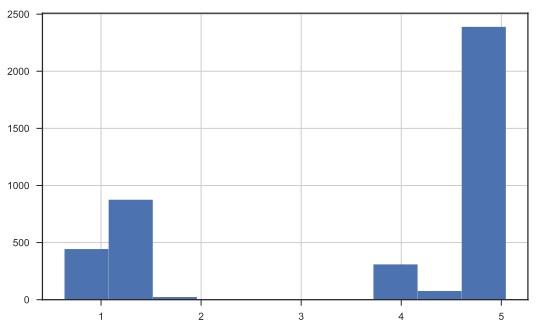

In [ ]:
bank['euribor3m'].hist()

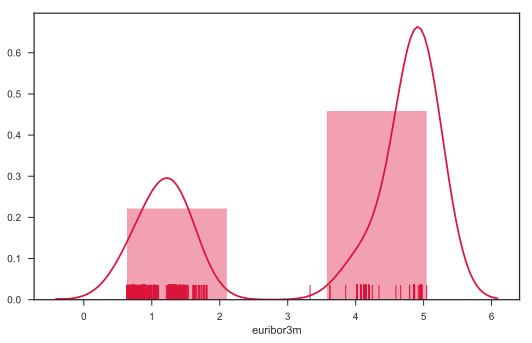

In [357]:
sns.distplot(bank['euribor3m'],hist=True,norm_hist=False,color='crimson',rug=True,bins=3)
#,rug=True
#,kde=False,hist=False
#ako ne stavis bins, optimalno sam odredi po nekom pravilu 
#sns.distplot(churn['CustServ Calls'], bins=5)
#sns.despine(offset=10, trim=True)
#display_pdf(a)

In [ ]:
#sns.violinplot(x=bank.y, y=bank.marital, inner=None, orient='v')
#sns.swarmplot(x=bank.y, y=bank.marital, color="white", edgecolor="gray")

# Violin plot

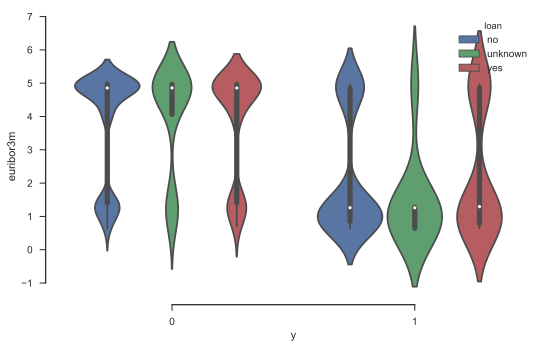

In [358]:
sns.violinplot(x=bank['y'], y=bank['euribor3m'],orient='v',hue=bank['loan'])
sns.despine(offset=5, trim=True)

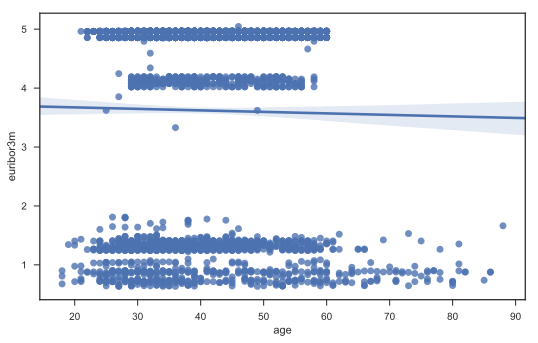

In [159]:
sns.regplot(x='age',y='euribor3m',data=bank)

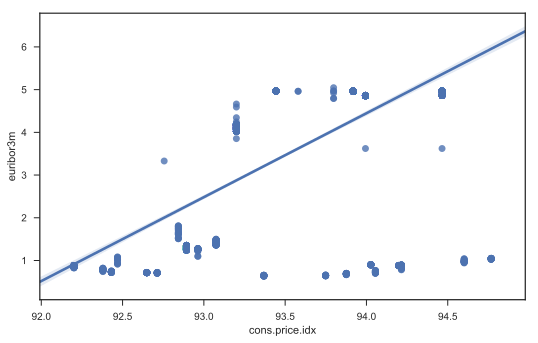

In [160]:
sns.regplot(x='cons.price.idx',y='euribor3m',data=bank)

In [161]:
bank.shape

(4118, 17)

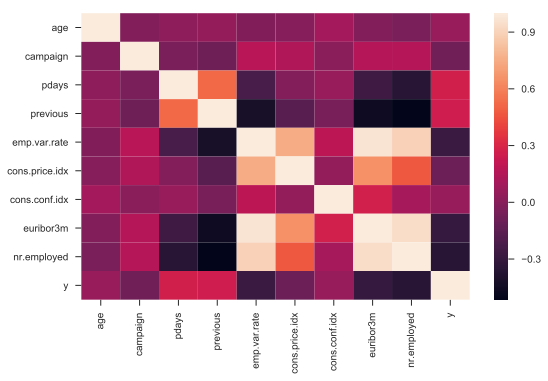

In [359]:
#from rpy2.robjects import r, pandas2ri
#import rpy2.robjects as robjects
 
# calculate the correlation matrix
corr = bank.corr()

# plot the heatmap
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns)

In [361]:
#high_corr_var=np.where(corr>0.8)
#high_corr_var=[(corr.columns[x],corr.columns[y]) for x,y in zip(*corr) if x!=y and x<y]

#high_corr_var


corr_matrix1 = bank.corr().abs()

#the matrix is symmetric so we need to extract upper triangle matrix without diagonal (k = 1)
os = (corr_matrix1.where(np.triu(np.ones(corr_matrix1.shape), k=1).astype(np.bool))
                 .stack()
                 .sort_values(ascending=False))
#first element of os series is the pair with the bigest correlation



def topKorelisani(n):
    print(os.nlargest(n))

In [378]:
#TOP KORELISANI PAROVI GDE JE KORELACIJA VECA od 0.8
topKorelisani(len((np.where(os>0.8))[0]))

emp.var.rate  euribor3m      0.969808
euribor3m     nr.employed    0.942431
emp.var.rate  nr.employed    0.896515
dtype: float64


In [380]:
#Postoji korelacija izmedju emp.var.rate i euribor3m i nr.employed...
#
#correlated_attributes=[]
#for c in range(len(corr)):
 #   print(corr[1,1])
    
    #if(corr[c]>0.8):
     #   correlated_attributes.append(list(corr.columns[c]))
bank_cluster=bank.select_dtypes(exclude=['object'])
bank_cluster.drop('nr.employed',axis=1,inplace=True)
#dummy_bank.drop('nr.employed',axis=1,inplace=True)
bank_cluster.drop('emp.var.rate',axis=1,inplace=True)
#dummy_bank.drop('emp.var.rate',axis=1,inplace=True)
bank_cluster.drop('y',axis=1,inplace=True)
#dummy_bank.drop('y',axis=1,inplace=True)

#bank.drop('cons.price.idx',axis=1,inplace=True)
#dummy_bank.drop('cons.price.idx',axis=1,inplace=True)

ValueError: labels ['nr.employed'] not contained in axis

In [381]:
cmap = cmap=sns.diverging_palette(5, 250, as_cmap=True)
# calculate the correlation matrix
corr = bank.corr()
def magnify():
    return [dict(selector="th",
                 props=[("font-size", "7pt")]),
            dict(selector="td",
                 props=[('padding', "0em 0em")]),
            dict(selector="th:hover",
                 props=[("font-size", "12pt")]),
            dict(selector="tr:hover td:hover",
                 props=[('max-width', '200px'),
                        ('font-size', '12pt')])
]

corr.style.background_gradient(cmap, axis=1)\
    .set_properties(**{'max-width': '80px', 'font-size': '10pt'})\
    .set_caption("Hover to magify")\
    .set_precision(2)\
    .set_table_styles(magnify())

In [ ]:
sns.pairplot(bank.loc[:, :])
sns.despine(offset=10, trim=True)

#nema korelacije mogu klasterii da se prave

In [ ]:
#sns.pairplot(bank.loc[:, 'cons.price.idx':'cons.conf.idx'])
#sns.despine(offset=10, trim=True)

In [ ]:
bank.dtypes

In [ ]:
#h= sns.PairGrid(bank.loc[:, 'age':'campaign'])
#h.map_offdiag(sns.kdeplot,cmap="Blues_d")
#h.map_offdiag(sns.kdeplot, cmap="Blues_d", n_levels=6)
#sns.despine(offset=10, trim=True)

# Klasterovanje 

In [304]:
from sklearn import cluster

In [305]:
#bez dummy variables
bank_cluster=bank.select_dtypes(exclude=['object'])
#bank_cluster=bank.drop('y',axis=1).select_dtypes(exclude=['object'])

In [306]:
bank_cluster.head()

age  campaign  pdays  previous  cons.price.idx  cons.conf.idx  euribor3m
0   30       2.0     -1       0.0          92.893          -46.2      1.313
1   39       4.0     -1       0.0          93.994          -36.4      4.855
2   25       1.0     -1       0.0          94.465          -41.8      4.962
3   38       3.0     -1       0.0          94.465          -41.8      4.959
4   47       1.0     -1       0.0          93.200          -42.0      4.191

In [307]:
for n in range(2,11):
    kMeans=cluster.KMeans(n_clusters=n)
    kMeans.fit(bank_cluster)
    cluster_labels = kMeans.fit_predict(bank_cluster)
    silhouette_avg = silhouette_score(bank_cluster, cluster_labels)
    print('Broj klastera: ',n,' ',silhouette_avg)
#3 ce biti zasad

Broj klastera:  2   0.459310788562
Broj klastera:  3   0.326673391445
Broj klastera:  4   0.312135264408
Broj klastera:  5   0.317098652408
Broj klastera:  6   0.318527987307
Broj klastera:  7   0.308966807758
Broj klastera:  8   0.310775977149
Broj klastera:  9   0.31982424686
Broj klastera:  10   0.304570811858


Text(0.5,1,'Elbow curve')

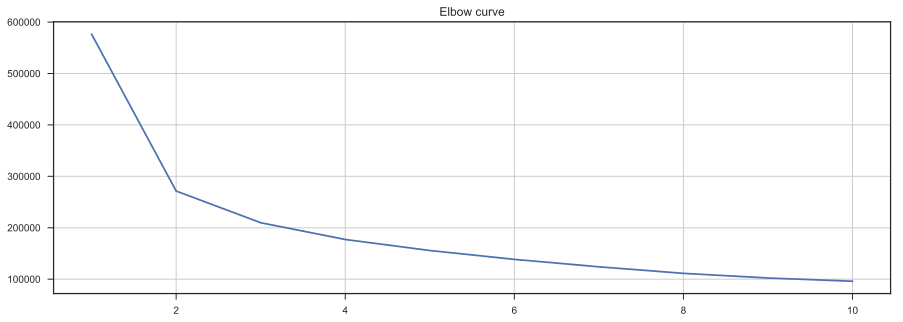

In [308]:
from sklearn.cluster import KMeans
from matplotlib import pyplot as plt

X = bank_cluster
distorsions = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)
    distorsions.append(kmeans.inertia_)

fig = plt.figure(figsize=(15, 5))
plt.plot(range(1, 11), distorsions)
plt.grid(True)
plt.title('Elbow curve')

In [309]:
#sa dummy variables
bank_cluster_dummies=dummy_bank

In [310]:
for n in range(2,11):
    kMeans2=cluster.KMeans(n_clusters=n)
    kMeans2.fit(bank_cluster_dummies)
    cluster_labels = kMeans.fit_predict(bank_cluster_dummies)
    silhouette_avg = silhouette_score(bank_cluster_dummies, cluster_labels)
    print('Broj klastera: ',n,' ',silhouette_avg)

Broj klastera:  2   0.475341116233
Broj klastera:  3   0.475898787268
Broj klastera:  4   0.477290236935
Broj klastera:  5   0.477290236935
Broj klastera:  6   0.475341116233
Broj klastera:  7   0.475319643622
Broj klastera:  8   0.475341116233
Broj klastera:  9   0.475920259879
Broj klastera:  10   0.473949666566


In [311]:
kMeans=cluster.KMeans(n_clusters=3)
kMeansModel=kMeans.fit(bank_cluster)
cluster_labels = kMeans.fit_predict(bank_cluster)
silhouette_avg = silhouette_score(bank_cluster, cluster_labels)
print('Broj klastera: ',3,' ',silhouette_avg)

Broj klastera:  3   0.326673391445


In [312]:
k_means_table=pd.DataFrame(bank_cluster)
k_means_table['Target Cluster']=kMeans.fit_predict(k_means_table)

In [303]:
k_means_table.head(7)

age  campaign  pdays  previous  cons.price.idx  cons.conf.idx  euribor3m  \
0   30       2.0     -1       0.0          92.893          -46.2      1.313   
1   39       4.0     -1       0.0          93.994          -36.4      4.855   
2   25       1.0     -1       0.0          94.465          -41.8      4.962   
3   38       3.0     -1       0.0          94.465          -41.8      4.959   
4   47       1.0     -1       0.0          93.200          -42.0      4.191   
5   32       3.0     -1       2.0          94.199          -37.5      0.884   
6   32       4.0     -1       0.0          94.199          -37.5      0.879   

   Cluster  Target Cluster  
0        1               1  
1        0               2  
2        1               1  
3        0               2  
4        0               2  
5        1               1  
6        1               1

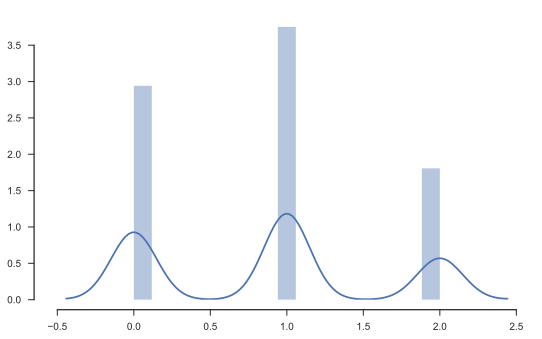

In [249]:
sns.distplot(kMeans.labels_)
sns.despine(offset=10, trim=True)

In [250]:
#kMeans.cluster_centers_

In [251]:
bank_cluster.drop(['Cluster'],axis=1,inplace=True)
bank_cluster.columns

Index(['age', 'campaign', 'pdays', 'previous', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'Cluster'],
      dtype='object')

In [254]:
cluster_representatives=pd.DataFrame(kMeans.cluster_centers_, columns= bank_cluster.columns, index = range(1,4))
cluster_representatives

ValueError: Shape of passed values is (7, 3), indices imply (8, 3)

In [253]:
a=cluster_representatives.melt()

In [225]:
b=a.value
b1=a.variable

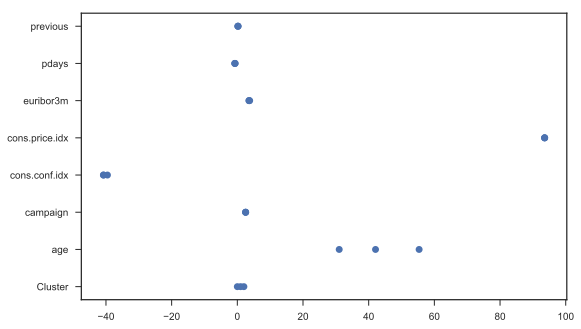

In [226]:
plt.plot(b,b1,'o')

In [255]:
kMeans.cluster_centers_.shape[0]
labels=kMeans.labels_
centers = np.array(kMeans.cluster_centers_)
number_of_clusters=kMeans.cluster_centers_.shape[0]

In [256]:
#centroidi klastera

In [266]:
centers[:,6]

array([ 3.77786316,  3.52747213,  3.56139009])

### Vizualizacija centroida 

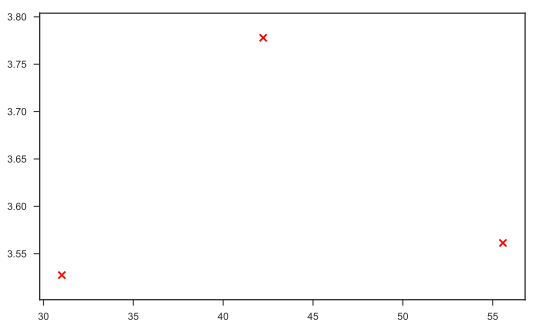

In [274]:
centers = np.array(kMeans.cluster_centers_)
plt.scatter(centers[:,0], centers[:,6], marker="x", color='r')

### Vizualizacija centroida i objekata koji pripadaju tom centroidu


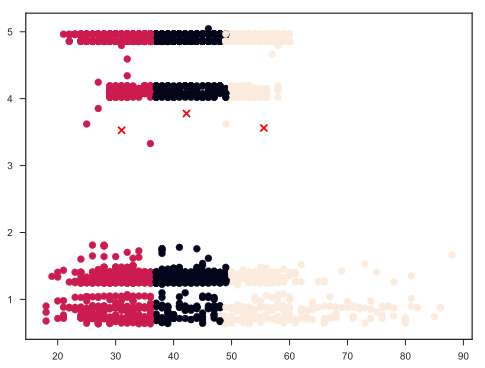

In [277]:

# Scaling the data to normalize
model = kMeansModel

# Visualize it:
plt.figure(figsize=(8, 6))
plt.scatter(bank_cluster.iloc[:,0], bank_cluster.iloc[:,6], c=model.labels_.astype(float))
plt.scatter(centers[:,0], centers[:,6], marker="x", color='r')

#age i euribor3m <3

## Dijagram silueta - Silhouette plot

In [278]:
cluster_labels = kMeans.fit_predict(bank_cluster)
silhouette_avg = silhouette_score(bank_cluster, cluster_labels)

In [279]:
silhouette_avg

0.33367773595563971

In [280]:
#Classifiction tree-Decision tree

In [281]:
from sklearn import tree

In [282]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(bank_cluster,cluster_labels)

In [283]:
import graphviz

In [284]:
#np.unique(cluster_labels)
#temp_list=['0','1','2','3','4','5']

In [285]:
cluster_names=np.unique(cluster_labels).astype(str)


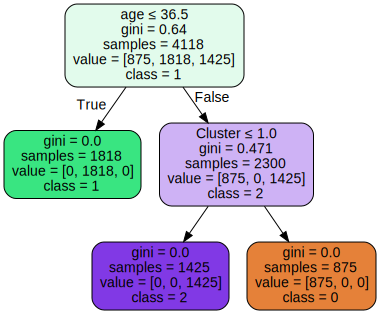

In [286]:
dot_data = tree.export_graphviz(clf, out_file=None, 
                         feature_names=bank_cluster.columns,  
                         class_names=cluster_names,  
                         filled=True, rounded=True,  
                         special_characters=True)  
graph = graphviz.Source(dot_data)  
graph 

In [287]:
bank['pdays'].unique()

array([-1, 12,  3,  6,  5,  2, 10, 11,  7,  1, 18,  4, 15,  0, 16,  9, 19,
       17, 13, 21, 14], dtype=int64)

In [288]:
kMeans_dummies=cluster.KMeans(n_clusters=4)

In [289]:
kMeans_dummies.fit(bank_cluster_dummies)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=4, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [290]:
kMeans_dummies.init='k-means++'

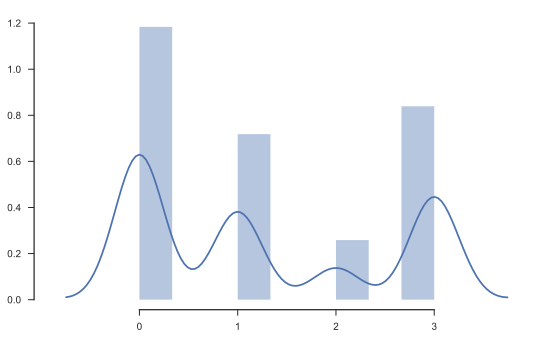

In [291]:
sns.distplot(kMeans_dummies.labels_)
sns.despine(offset=10, trim=True)

Kros validacija

In [292]:
treeX_train, treeX_test, treeY_train, treeY_test = train_test_split(bank_cluster,cluster_labels, test_size=0.3, random_state=42)

In [293]:
params = [
  {'n_estimators': [1,5,10, 20, 40, 100], 'max_depth': [3,4, 5, 6,7,8,9,10],'min_samples_leaf':[20,30,50,100]}
 ]

In [294]:
optimizer = GridSearchCV(rf, 
                   param_grid=params,
                      #opt_rf.best_estimator_
    #scoring='roc_auc',
                         cv=3,  
                   return_train_score=True)

In [295]:
opt_rf=optimizer.fit(treeX_train,treeY_train)

#n_estimators=100 i max_depth=5

#probas_opt=opt_rf.predict_proba(x_test)

In [296]:
predictions_opt=opt_rf.predict(treeX_test)
predictions_opt

array([2, 2, 1, ..., 1, 2, 2])

In [297]:
opt_rf.best_estimator_

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=3, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=20, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=20, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [298]:
clf_opt = tree.DecisionTreeClassifier(max_depth=10,min_samples_leaf=20)
clf_opt = clf_opt.fit(bank_cluster, cluster_labels )

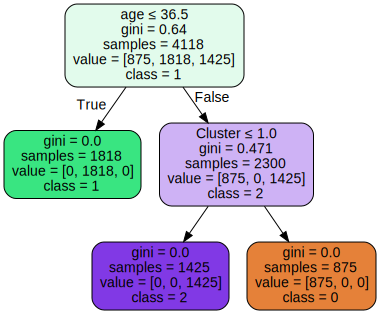

In [299]:
dot_data = tree.export_graphviz(clf_opt, out_file=None, 
                         feature_names=bank_cluster.columns,  
                         class_names=cluster_names,  
                         filled=True, rounded=True,  
                         special_characters=True)  
graph = graphviz.Source(dot_data)  
graph 


## Vizualizacija klastera

Automatically created module for IPython interactive environment
For n_clusters = 2 The average silhouette_score is : 0.457854183081


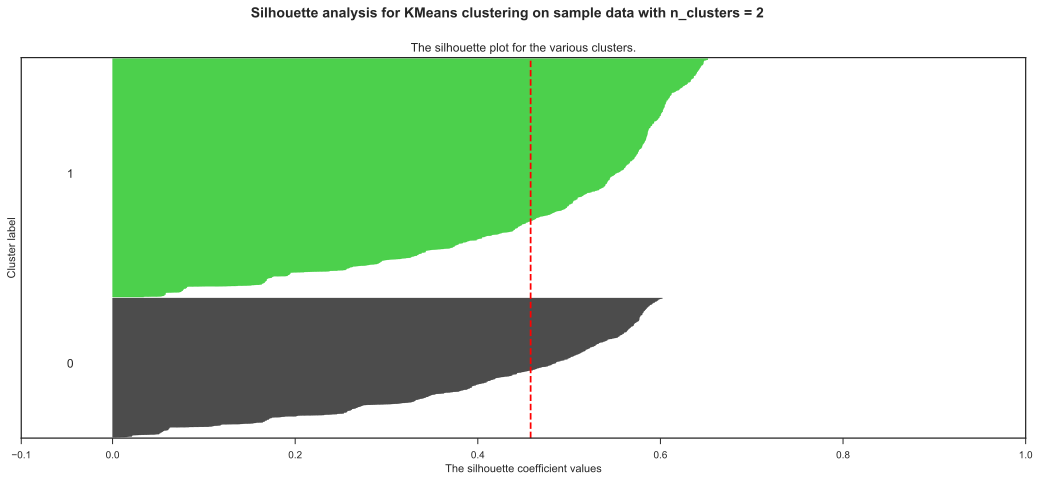

For n_clusters = 3 The average silhouette_score is : 0.333677735956


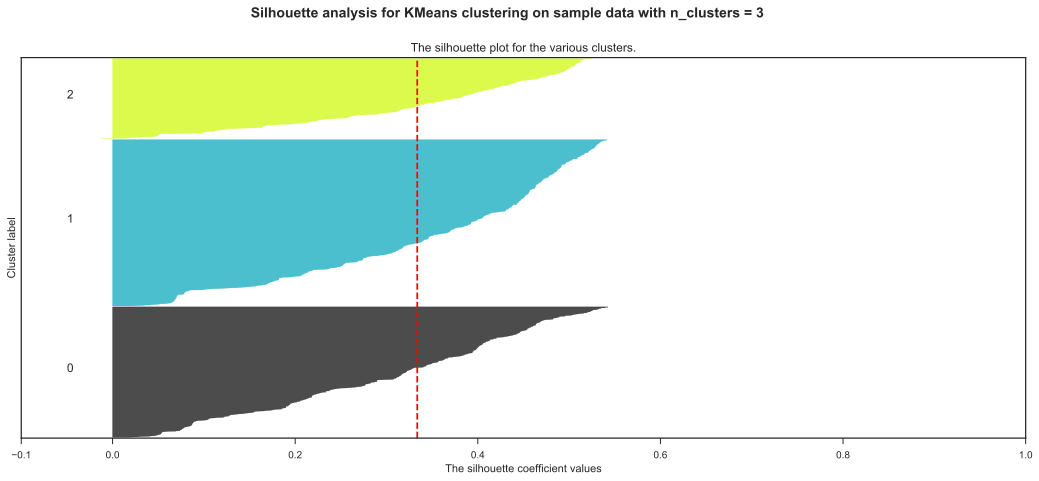

For n_clusters = 4 The average silhouette_score is : 0.316242333458


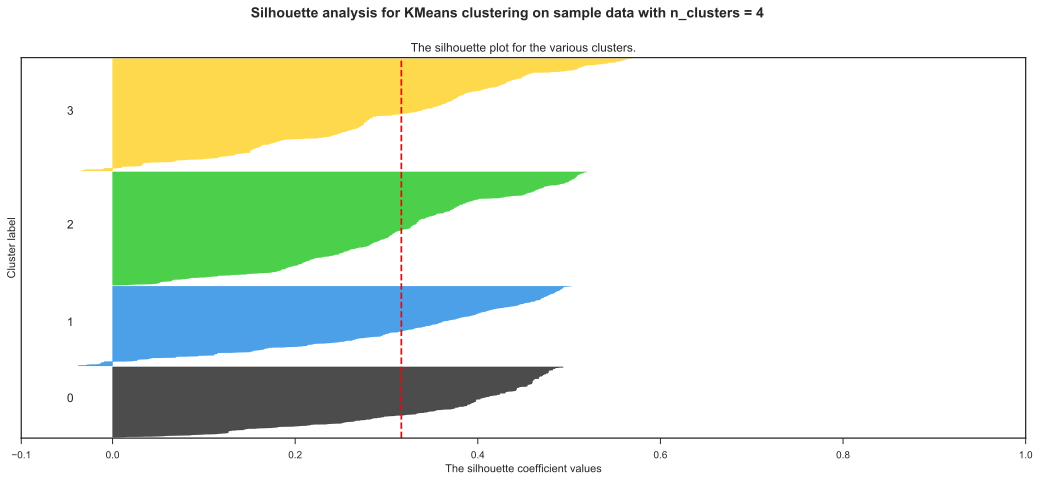

For n_clusters = 5 The average silhouette_score is : 0.320170408811


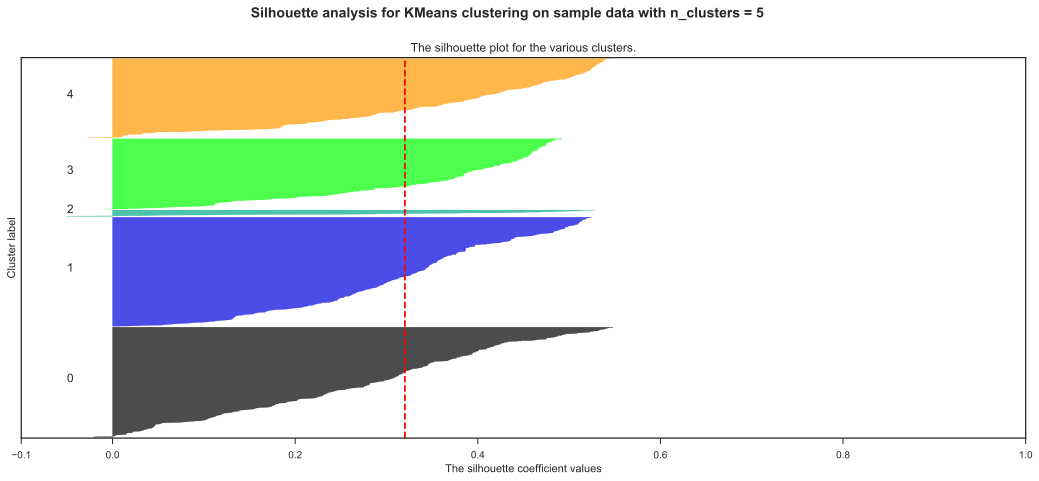

For n_clusters = 6 The average silhouette_score is : 0.32016051795


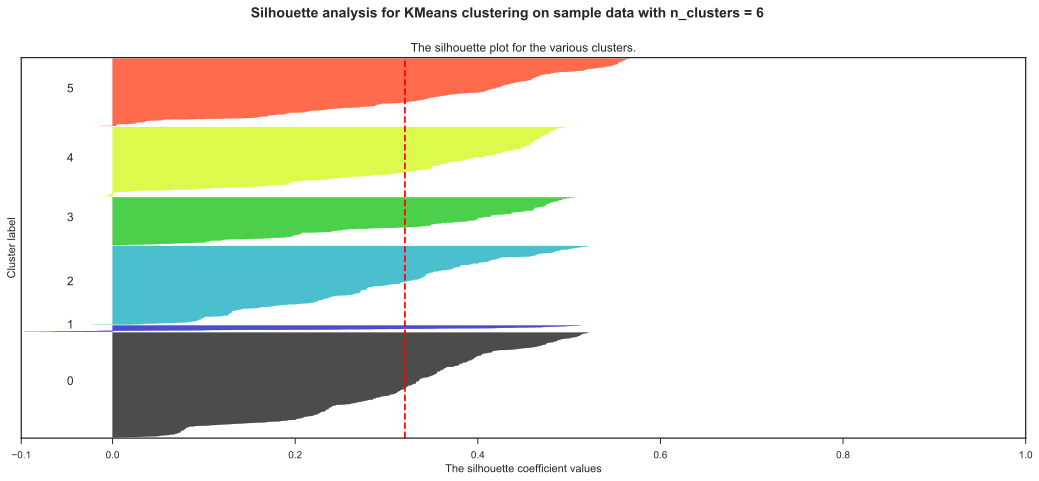

In [300]:
from __future__ import print_function

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

print(__doc__)

# Generating the sample data from make_blobs
# This particular setting has one distinct cluster and 3 clusters placed close
# together.
X=bank_cluster  # For reproducibility

range_n_clusters = [2, 3, 4, 5, 6]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1) = plt.subplots(1)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
 
    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

    plt.show()

In [301]:
sample_silhouette_values = silhouette_samples(bank_cluster, cluster_labels)
sample_silhouette_values

array([ 0.51860868,  0.19010348,  0.25481839, ...,  0.47041547,
        0.45715246,  0.2775398 ])

# BRISI

In [ ]:
print(__doc__)

from time import time
import numpy as np
import matplotlib.pyplot as plt

from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale

np.random.seed(42)

digits = bank
data = scale(digits.data)

n_samples, n_features = data.shape
n_digits = len(np.unique(digits.target))
labels = digits.target

sample_size = 300

print("n_digits: %d, \t n_samples %d, \t n_features %d"
      % (n_digits, n_samples, n_features))


print(82 * '_')
print('init\t\ttime\tinertia\thomo\tcompl\tv-meas\tARI\tAMI\tsilhouette')


def bench_k_means(estimator, name, data):
    t0 = time()
    estimator.fit(data)
    print('%-9s\t%.2fs\t%i\t%.3f\t%.3f\t%.3f\t%.3f\t%.3f\t%.3f'
          % (name, (time() - t0), estimator.inertia_,
             metrics.homogeneity_score(labels, estimator.labels_),
             metrics.completeness_score(labels, estimator.labels_),
             metrics.v_measure_score(labels, estimator.labels_),
             metrics.adjusted_rand_score(labels, estimator.labels_),
             metrics.adjusted_mutual_info_score(labels,  estimator.labels_),
             metrics.silhouette_score(data, estimator.labels_,
                                      metric='euclidean',
                                      sample_size=sample_size)))

bench_k_means(KMeans(init='k-means++', n_clusters=n_digits, n_init=10),
              name="k-means++", data=data)

bench_k_means(KMeans(init='random', n_clusters=n_digits, n_init=10),
              name="random", data=data)

# in this case the seeding of the centers is deterministic, hence we run the
# kmeans algorithm only once with n_init=1
pca = PCA(n_components=n_digits).fit(data)
bench_k_means(KMeans(init=pca.components_, n_clusters=n_digits, n_init=1),
              name="PCA-based",
              data=data)
print(82 * '_')

# #############################################################################
# Visualize the results on PCA-reduced data

reduced_data = PCA(n_components=2).fit_transform(data)
kmeans = KMeans(init='k-means++', n_clusters=n_digits, n_init=10)
kmeans.fit(reduced_data)

# Step size of the mesh. Decrease to increase the quality of the VQ.
h = .02     # point in the mesh [x_min, x_max]x[y_min, y_max].

# Plot the decision boundary. For that, we will assign a color to each
x_min, x_max = reduced_data[:, 0].min() - 1, reduced_data[:, 0].max() + 1
y_min, y_max = reduced_data[:, 1].min() - 1, reduced_data[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Obtain labels for each point in mesh. Use last trained model.
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1)
plt.clf()
plt.imshow(Z, interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap=plt.cm.Paired,
           aspect='auto', origin='lower')

plt.plot(reduced_data[:, 0], reduced_data[:, 1], 'k.', markersize=2)
# Plot the centroids as a white X
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1],
            marker='x', s=169, linewidths=3,
            color='w', zorder=10)
plt.title('K-means clustering on the digits dataset (PCA-reduced data)\n'
          'Centroids are marked with white cross')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.show()

In [156]:
list

list

In [112]:
#dimension reduction